In [50]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [24]:
mnist = fetch_openml('mnist_784',version = 1)

In [46]:
X, y = mnist['data'],mnist['target']
some_digit = X.loc[0]


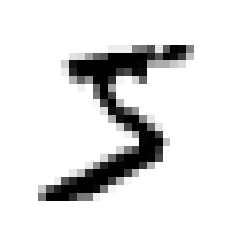

In [49]:
some_digit = X.loc[0].values
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

In [51]:
y = y.astype(np.uint8)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint64

In [52]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:], y[:60000],y[60000:]

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
y_train_5 = (y_train == 5)
y_test5 = (y_train == 5 )

In [66]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict([some_digit])

array([ True])

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3 , scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [72]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y = None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [74]:
never_5_class = Never5Classifier()
cross_val_score(never_5_class,X_train,y_train_5,cv= 3,scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train_5,y_train_pred)
recall = recall_score(y_train_5,y_train_pred)
precision,recall


(0.8370879772350012, 0.6511713705958311)

In [84]:
f1 = f1_score(y_train_5,y_train_pred)
f1

0.7325171197343846

In [85]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

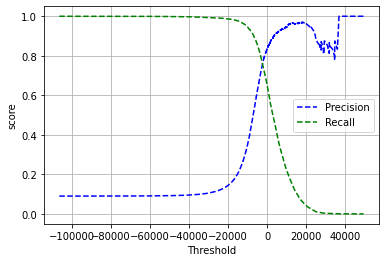

In [103]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label = 'Precision')
    plt.plot(thresholds,recalls[:-1],'g--',label = 'Recall')
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('score')
    plt.grid()
    plt.show()
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [94]:
len(y_scores)

60000

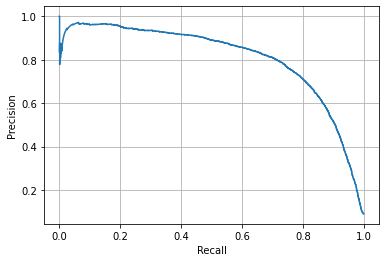

In [107]:
def precison_recall_curve(recalls,precisions):
    plt.plot(recalls,precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.show()
precison_recall_curve(recalls,precisions)